In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
ford_df = pd.read_csv("data/ford.csv")
nissan_df = pd.read_csv("data/nissan.csv")
toyota_df = pd.read_csv("data/toyota.csv")
honda_df = pd.read_csv("data/honda.csv")
kia_df = pd.read_csv("data/kia.csv")

full_df = pd.concat([ford_df, nissan_df, toyota_df, honda_df, kia_df])
full_df['year'] = full_df['year'].astype(object)

full_df['price'] = full_df['price'].replace('Not Priced', np.NAN)
full_df['price'] = pd.to_numeric(full_df["price"])
full_df["model"] = full_df["model"].str.strip()

In [3]:
full_df.head()

,brand,model,year,price,mileage,exterior_color,interior_color,fuel_type,engine,transmission,city_mpg,hwy_mpg
0,Ford,Fusion SE,2010,5238.0,153715.0,Tuxedo Black Metallic,Charcoal Black,E85 Flex Fuel,Gas/Ethanol V6 3.0L/181,6-Speed A/T,22.0,29.0
1,Ford,Fusion Hybrid SE,2014,11494.0,56446.0,Ruby Red Metallic Tinted Clearcoat,Dune,Hybrid,2.0L I4 16V MPFI DOHC Hybrid,Automatic CVT,44.0,41.0
2,Ford,Fusion SE,2015,10795.0,65942.0,Magnetic,Ebony,Gasoline,2.5L I4 16V MPFI DOHC,6-Speed Automatic,22.0,31.0
3,Ford,Taurus SE,2018,15999.0,2269.0,White Gold Metallic,Dune,E85 Flex Fuel,3.5L V6 24V MPFI DOHC Flexible Fuel,6-Speed Automatic,18.0,27.0
4,Ford,Fusion Titanium,2017,19280.0,19642.0,Shadow Black,Ebony,Gasoline,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,20.0,29.0


### Mean Mileage per Year

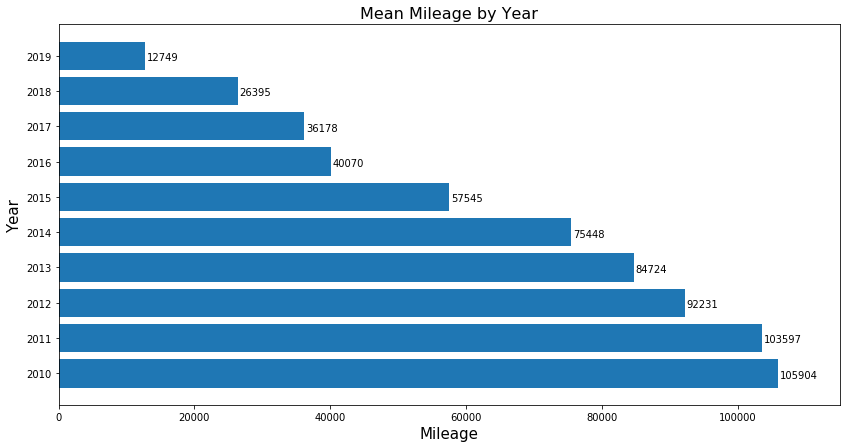

In [4]:
mean_mileage_year = full_df.groupby("year")['mileage'].mean().round(0).astype(int)

plt.figure(figsize=(14,7))

plt.barh(mean_mileage_year.index, mean_mileage_year)
plt.yticks(mean_mileage_year.index)

plt.title("Mean Mileage by Year", fontsize=16)
plt.xlabel("Mileage", fontsize=15)
plt.ylabel("Year", fontsize=15)

plt.xlim([0,115000])

for year, miles in zip(mean_mileage_year.index, mean_mileage_year):
    plt.text(miles + 250, year - .125, miles)


plt.show()

### Mean Price per Brand

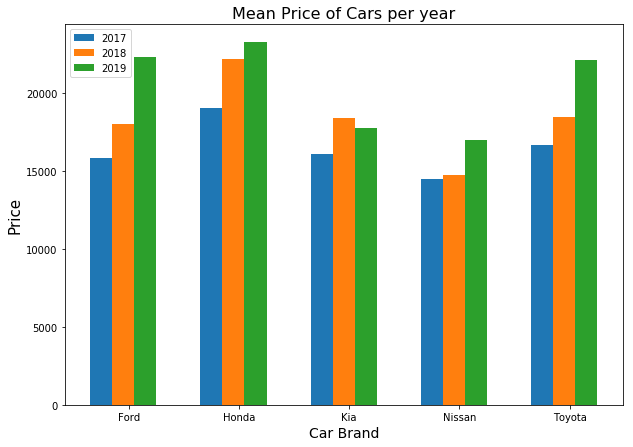

In [5]:
plt.figure(figsize=(10,7))

width = .2

years = [2017, 2018, 2019]

for bar in range(len(years)): 
    price_plot = full_df[full_df["year"] == years[bar]].groupby("brand")["price"].mean().round(0).astype(int).sort_index()
    
    plt.bar(np.arange(5) + width*bar, price_plot, label=f"{years[bar]}", width=width)
    
    
plt.title("Mean Price of Cars per year", fontsize=16)
plt.xlabel("Car Brand", fontsize=14)
plt.ylabel("Price", fontsize=15)

plt.legend()
plt.xticks(np.arange(5) + .25, price_plot.index)

plt.show()

### Exterior Color Price

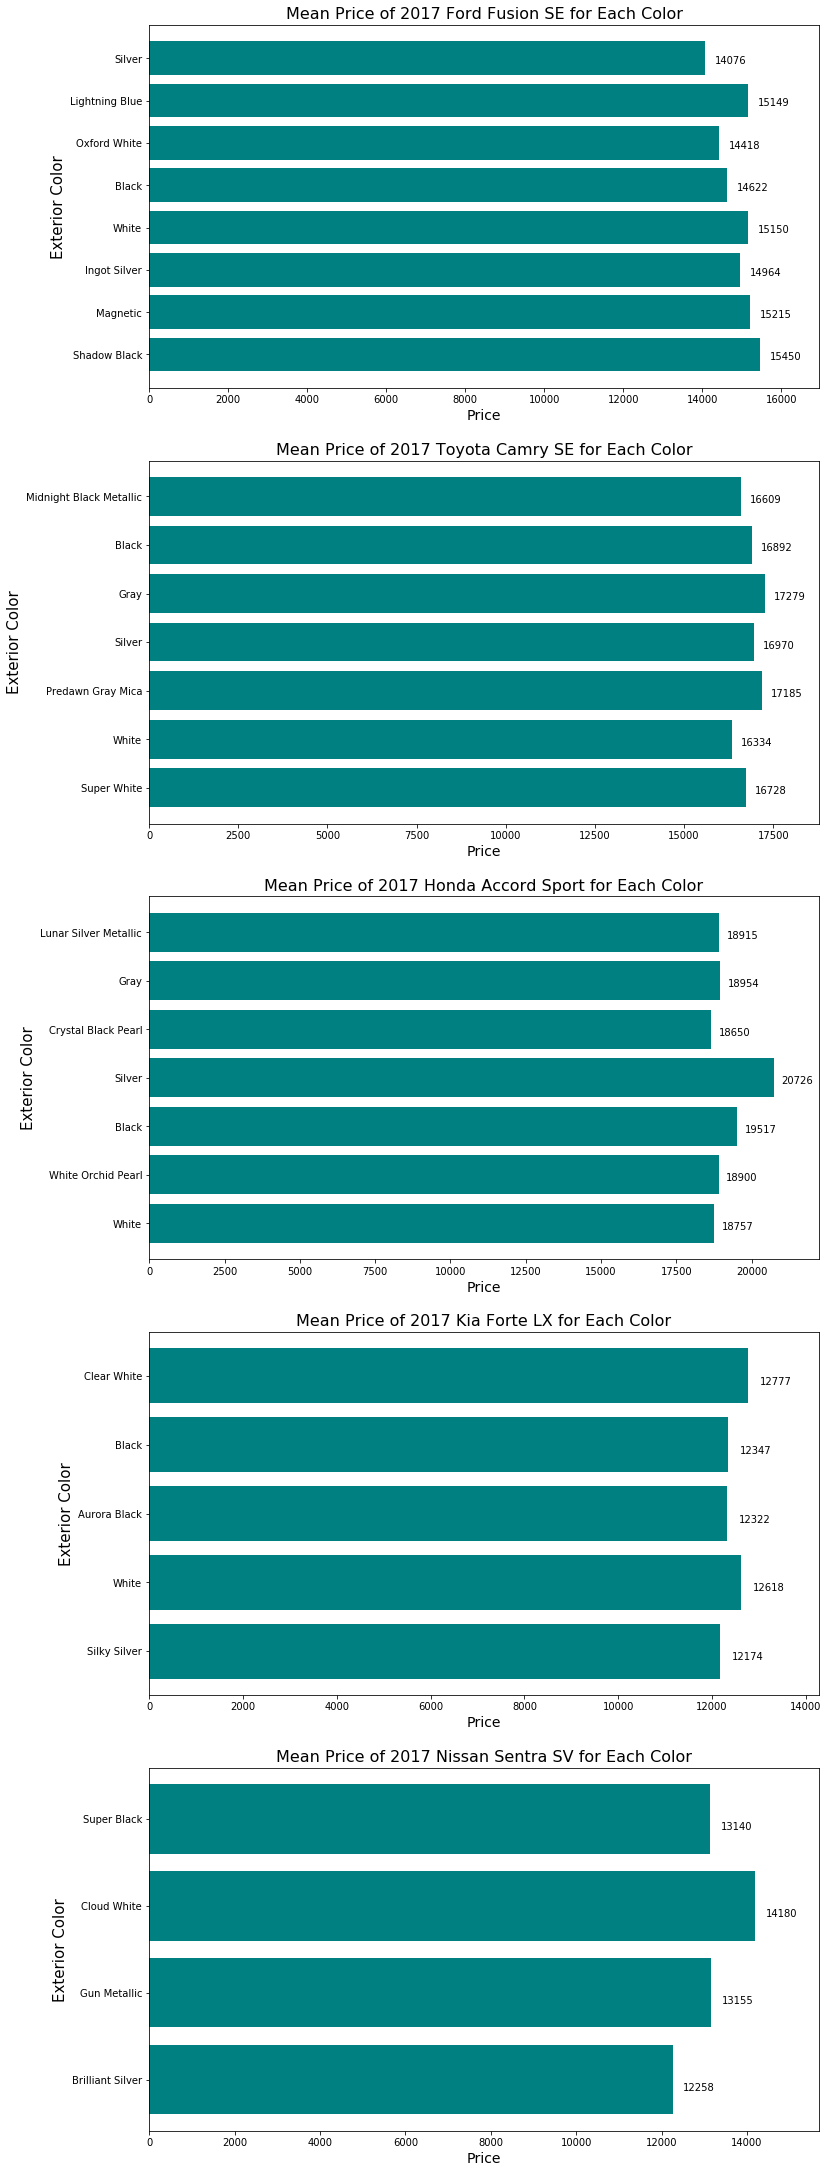

In [6]:
car_models = ["Fusion SE", "Camry SE", "Accord Sport", "Forte LX", "Sentra SV"]
brands = ["Ford", "Toyota", "Honda", "Kia", "Nissan"]

df_plot = full_df[(full_df["model"].isin(car_models)) & (full_df["year"] == 2017)]

plt.figure(figsize=(12,30))


for ind in range(5):
    colors = df_plot[df_plot["model"] == car_models[ind]]["exterior_color"].value_counts()
    colors = colors[colors >= 15].index

    plot_values = df_plot[df_plot["model"] == car_models[ind]].groupby("exterior_color")['price'].mean().reindex(colors).\
                    round(0).astype(int)
                        
    plt.subplot(5,1,ind+1)
    
    plt.barh(plot_values.index, plot_values, color="teal")
    
    plt.title(f"Mean Price of 2017 {brands[ind]} {car_models[ind]} for Each Color", fontsize=16)
    plt.xlabel("Price", fontsize=14)
    plt.ylabel("Exterior Color", fontsize=15)
    
    plt.xlim([0, plot_values.max()+1500])
    
    for index, price in enumerate(plot_values):
        plt.text(price + 250, index - .125, price)
    
plt.subplots_adjust(top=1.1)

plt.show()

### Price Change of Car Model per Year

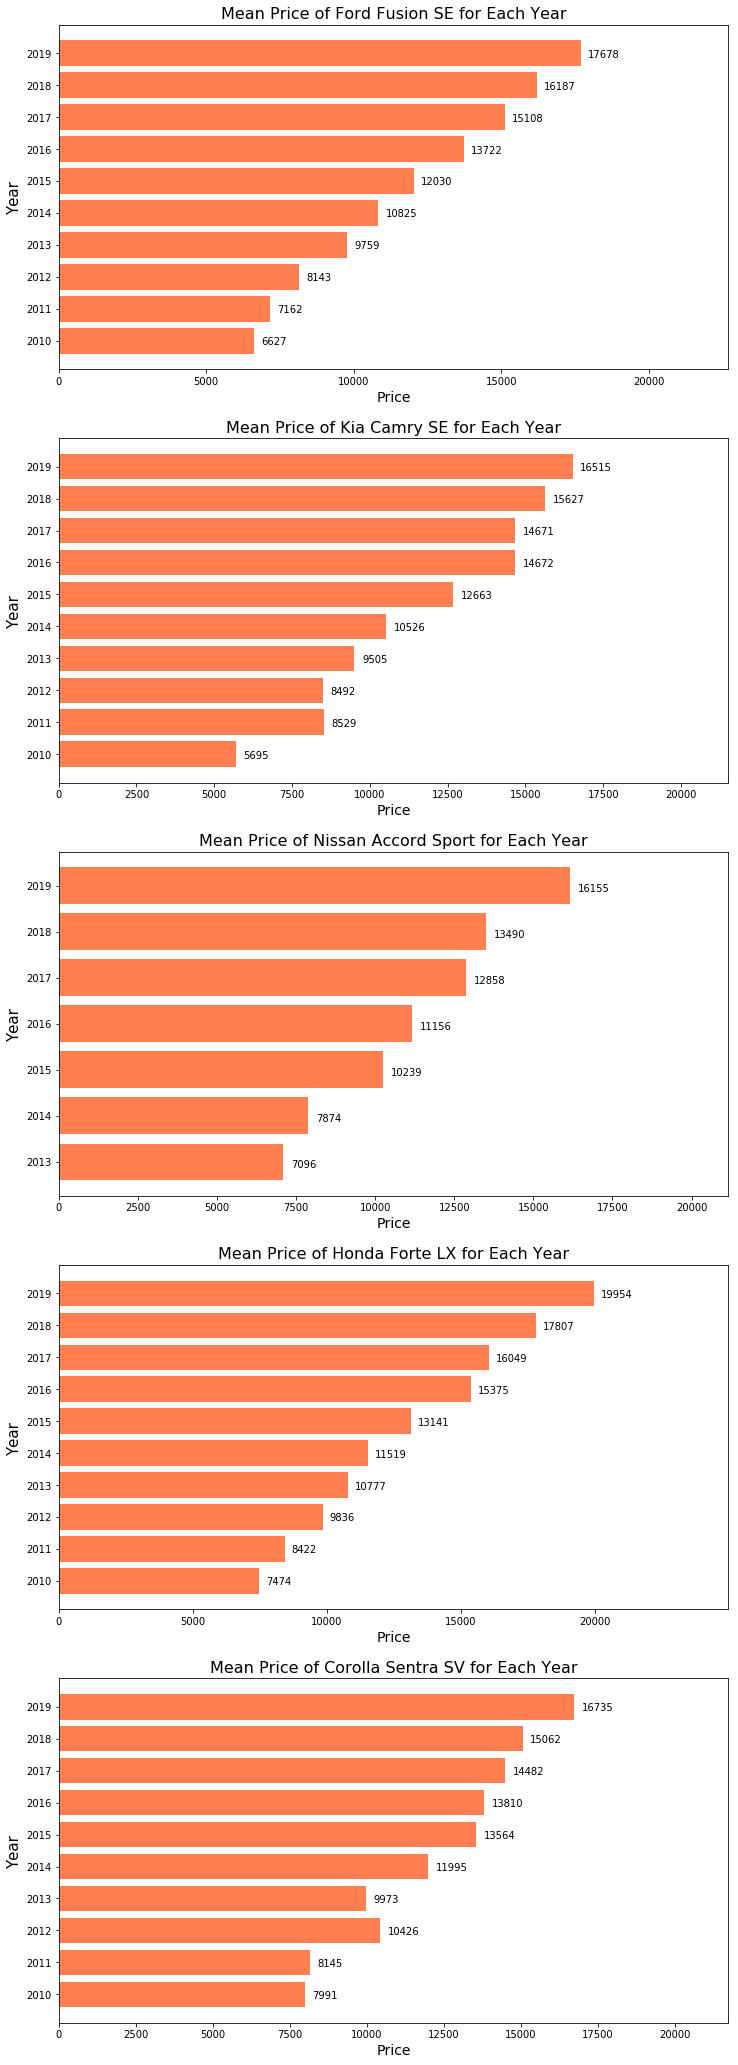

In [10]:
top_models = full_df["model"].value_counts().index[:5]
brands = ["Ford", "Kia", "Nissan", "Honda", "Corolla"]

plt.figure(figsize=(12,30))


for ind in range(5):
    year_price = full_df[full_df["model"] == top_models[ind]].groupby("year")["price"].mean().round(0).astype(int)
#     price_std = full_df[full_df["model"] == top_models[ind]].groupby("year")["price"].std().round(0).astype(int)
    
    plt.subplot(5,1,ind+1)
    
    plt.barh(year_price.index, year_price, color="coral")
    plt.yticks(year_price.index)
    
    plt.title(f"Mean Price of {brands[ind]} {car_models[ind]} for Each Year", fontsize=16)
    plt.xlabel("Price", fontsize=14)
    plt.ylabel("Year", fontsize=15)
    
    plt.xlim([0, year_price.max()+5000])
    
    for year, price in zip(year_price.index, year_price):
        plt.text(price + 250, year - .125, f"{price}")

    
plt.subplots_adjust(top=1.05)
plt.show()

### Gasoline vs Hybrid Prices

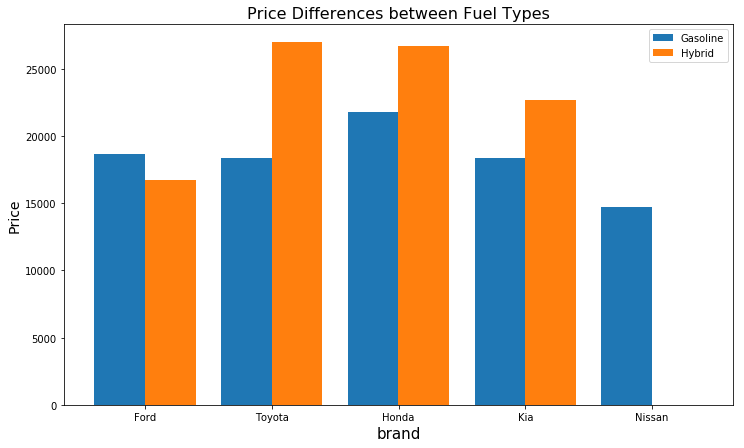

In [11]:
fuel_types = ['Gasoline', 'Hybrid']
fuel_df = full_df[(full_df["year"] == 2018) & (full_df["fuel_type"].isin(fuel_types))]
brands = ["Ford", "Toyota", "Honda", "Kia", "Nissan"]

width = .8/len(fuel_types)

plt.figure(figsize=(12,7))

for bar in range(len(fuel_types)):
    fuel_plot = fuel_df[fuel_df["fuel_type"] == fuel_types[bar]].groupby("brand")["price"].\
                                                                 mean().round(0).reindex(brands)
    
    fuel_plot = fuel_plot.replace(np.nan, 0)
    
    plt.bar(np.arange(len(fuel_plot)) + bar*width, fuel_plot, width=width, label=fuel_types[bar])

plt.title(f"Price Differences between Fuel Types", fontsize=16)
plt.ylabel("Price", fontsize=14)
plt.xlabel("brand", fontsize=15)

plt.xticks(np.arange(5) + width/2, brands)
plt.legend()

plt.show()

### Miles per Gallon vs Price

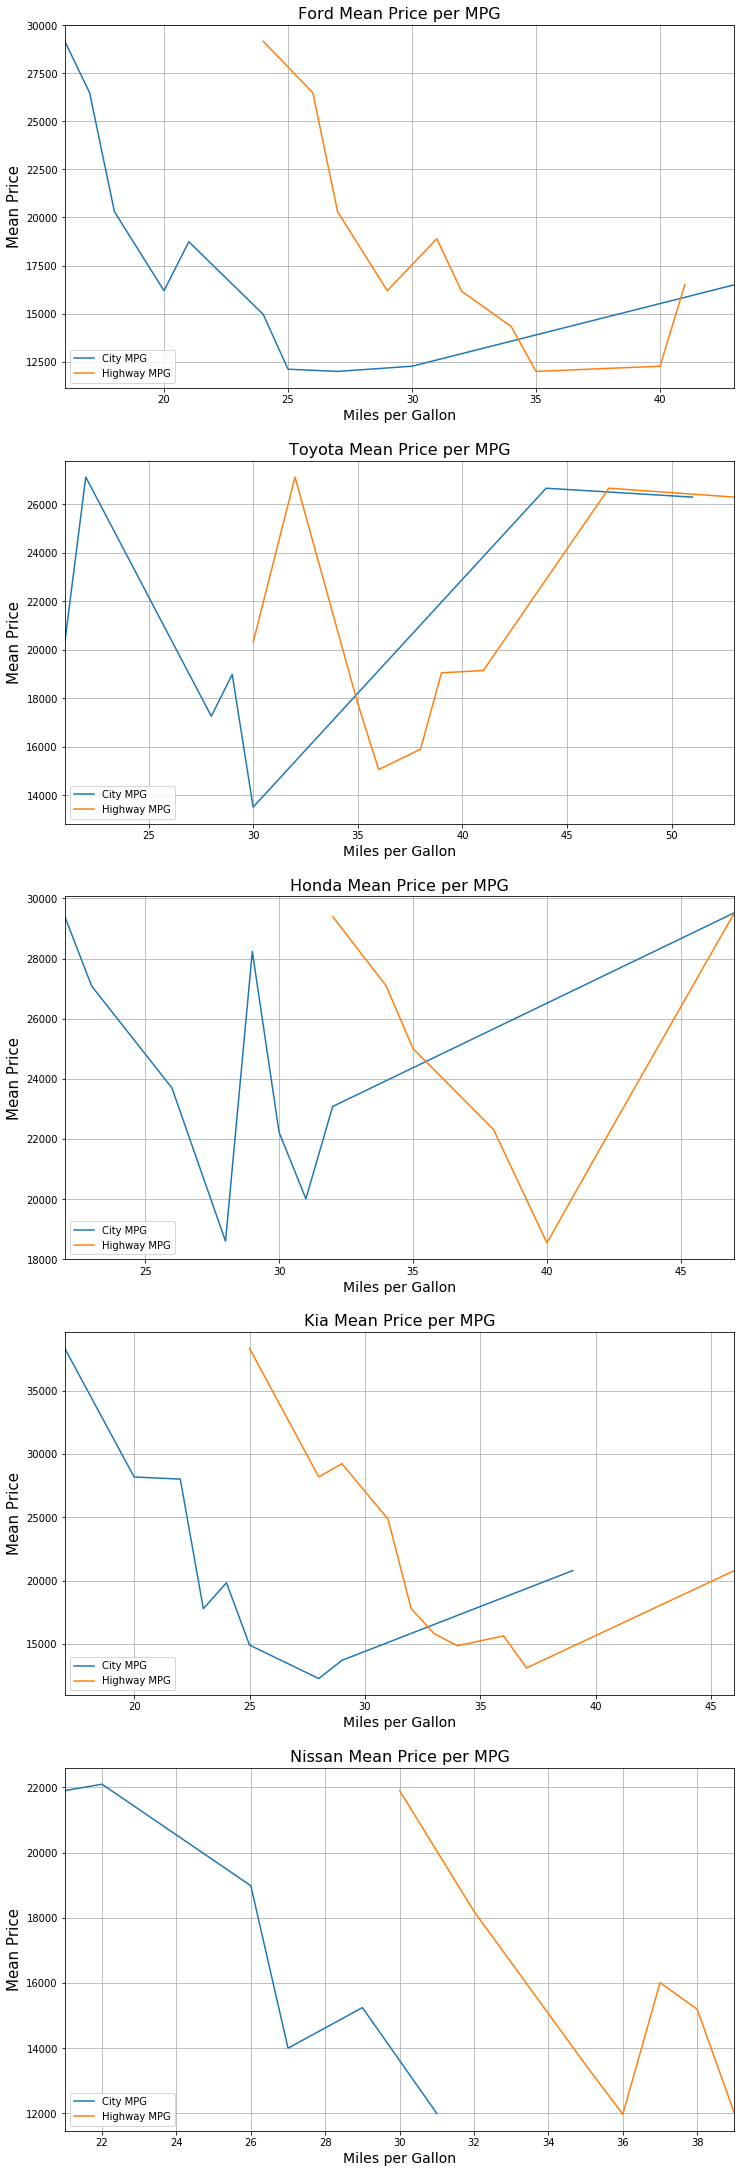

In [12]:
df_2018 = full_df[full_df["year"] == 2018]

brands = ["Ford", "Toyota", "Honda", "Kia", "Nissan"]

plt.figure(figsize=(12,30))

for ind, brand in enumerate(brands):
    plt.subplot(5,1,ind+1)
    
    df_2018[df_2018["brand"] == brand].groupby("city_mpg")["price"].mean().plot(label = "City MPG")
    df_2018[df_2018["brand"] == brand].groupby("hwy_mpg")["price"].mean().plot(label = "Highway MPG")
    
    plt.title(f"{brand} Mean Price per MPG", fontsize=16)
    plt.xlabel("Miles per Gallon", fontsize=14)
    plt.ylabel("Mean Price", fontsize=15)
    
    plt.legend(loc=3)
    plt.grid()
    
plt.subplots_adjust(top=1.1)

plt.show()

### Price per Engine

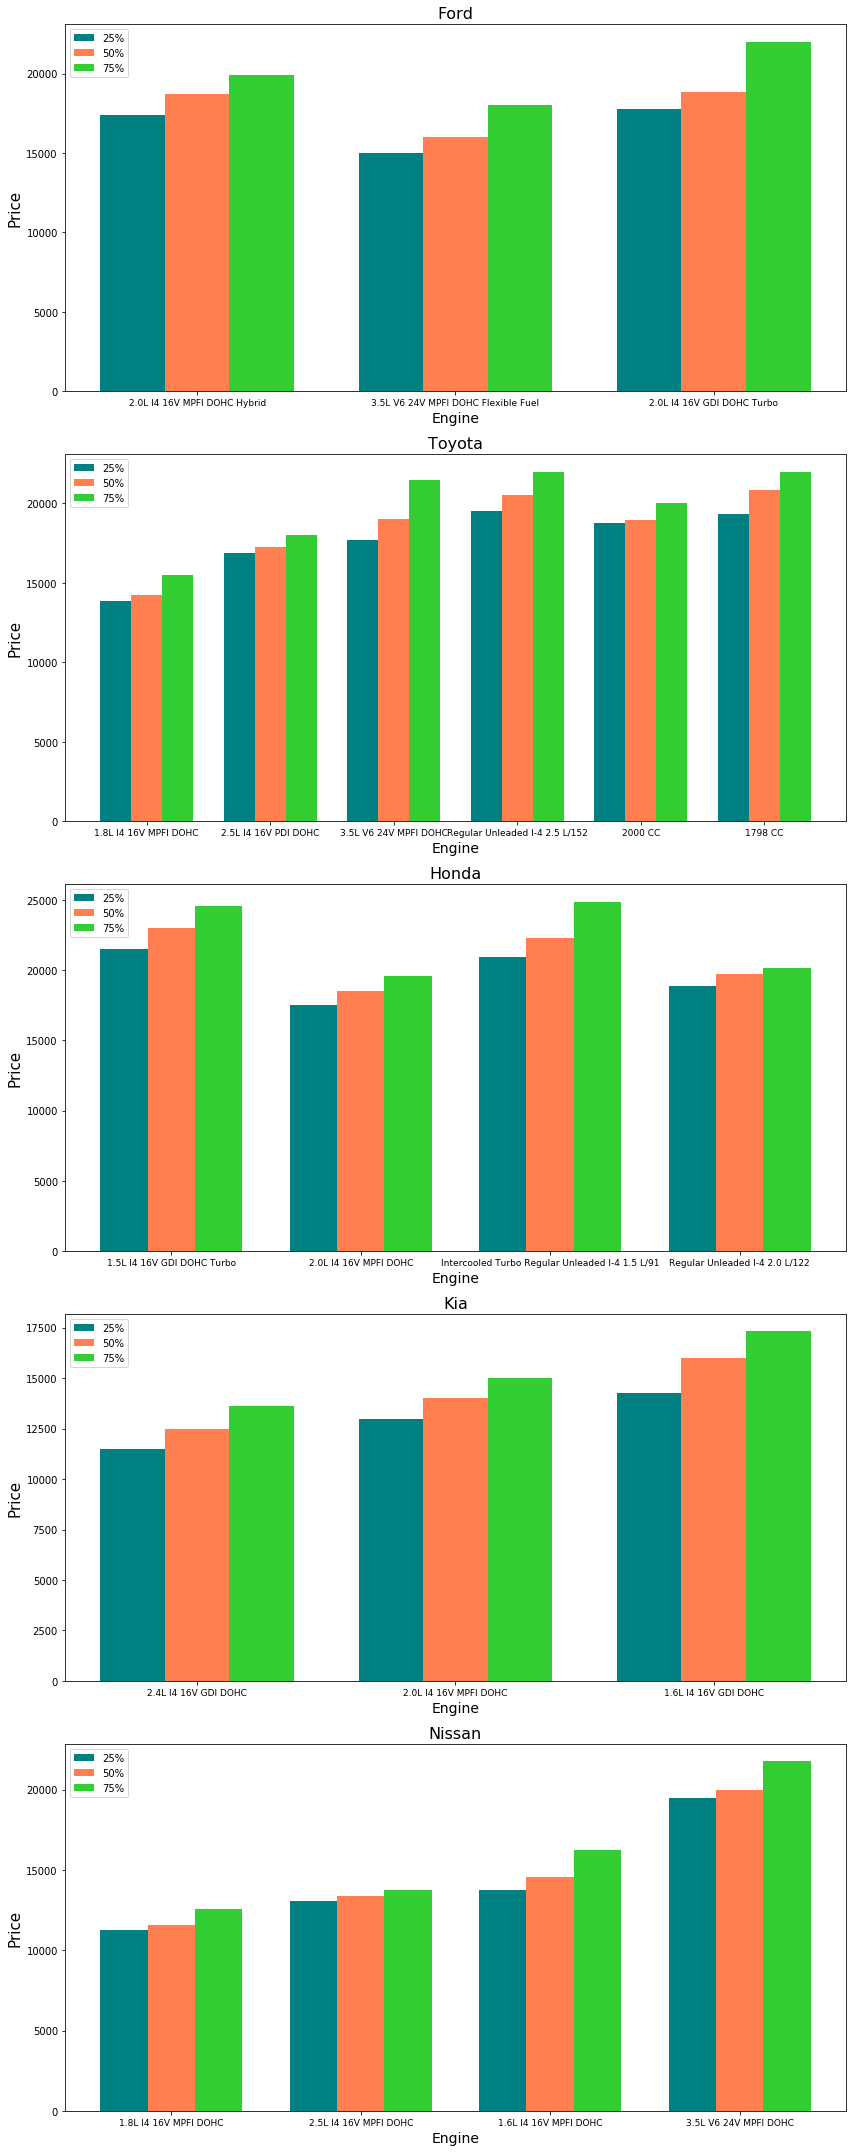

In [13]:
df_2018 = full_df[full_df["year"] == 2018]
brands = ["Ford", "Toyota", "Honda", "Kia", "Nissan"]

plt.figure(figsize=(12,30))

width = .25

for ind in range(len(brands)):
    brand_df = df_2018[df_2018["brand"] == brands[ind]]

    top_engines = brand_df["engine"].value_counts()
    top_engines = top_engines[top_engines >= 50].index
    
    plt.subplot(5,1,ind+1)
    
    top_25 = brand_df[brand_df["engine"].isin(top_engines)].groupby("engine")["price"].quantile(.25)
    top_50 = brand_df[brand_df["engine"].isin(top_engines)].groupby("engine")["price"].quantile(.50)
    top_75 = brand_df[brand_df["engine"].isin(top_engines)].groupby("engine")["price"].quantile(.75)
    
    plt.bar(np.arange(len(top_engines)), top_25, width=width, color="teal", label="25%")
    plt.bar(np.arange(len(top_engines)) + width, top_50, width=width, color="coral", label="50%")
    plt.bar(np.arange(len(top_engines)) + width*2, top_75, width=width, color="limegreen", label="75%")
    
    plt.xticks(np.arange(len(top_engines)) + width, top_engines, rotation=0, fontsize=9)
    
    plt.title(f"{brands[ind]}", fontsize=16)
    plt.xlabel("Engine", fontsize=14)
    plt.ylabel("Price", fontsize=15)
    
    plt.legend(loc=2)
    
plt.tight_layout()

### Price per Transmission 

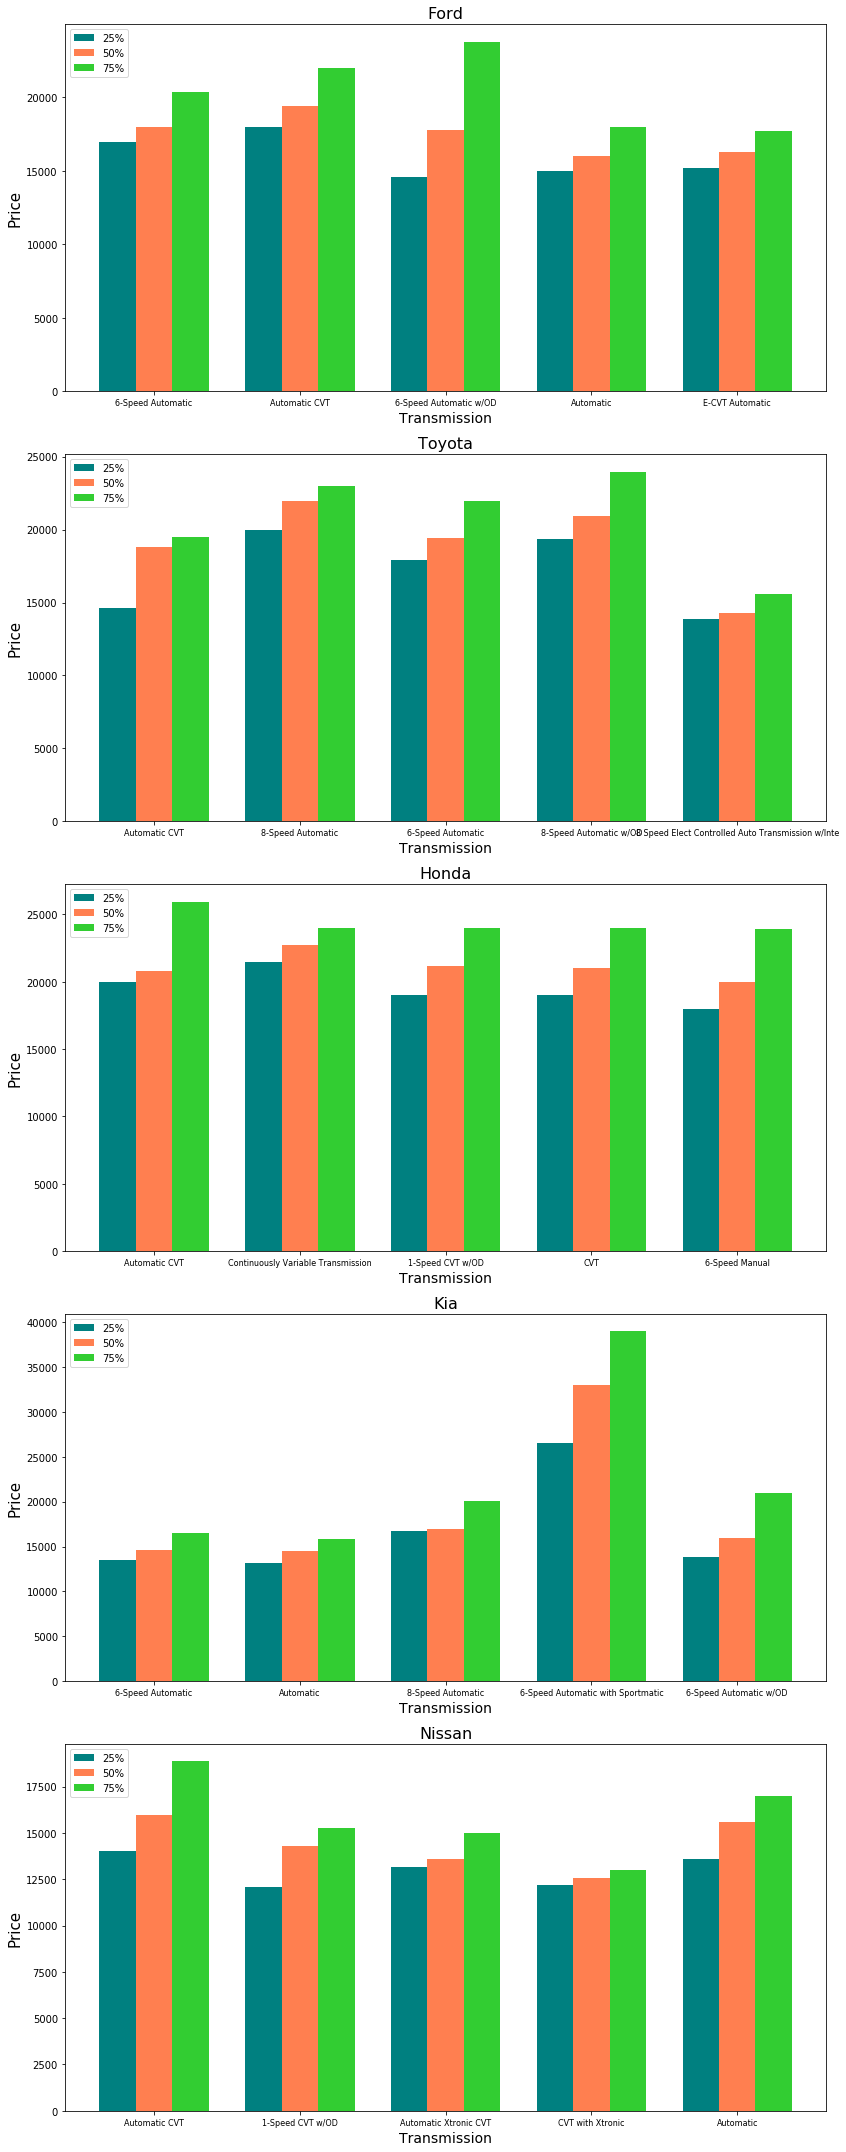

In [14]:
df_2018 = full_df[full_df["year"] == 2018]
brands = ["Ford", "Toyota", "Honda", "Kia", "Nissan"]

plt.figure(figsize=(12,30))

width = .25

for ind in range(len(brands)):
    brand_df = df_2018[df_2018["brand"] == brands[ind]]

    top_transmissions = brand_df["transmission"].value_counts()
    top_transmissions = top_transmissions[:5].index
    
    plt.subplot(5,1,ind+1)
    
    top_25 = brand_df[brand_df["transmission"].isin(top_transmissions)].groupby("transmission")["price"].quantile(.25)
    top_50 = brand_df[brand_df["transmission"].isin(top_transmissions)].groupby("transmission")["price"].quantile(.50)
    top_75 = brand_df[brand_df["transmission"].isin(top_transmissions)].groupby("transmission")["price"].quantile(.75)
    
    plt.bar(np.arange(len(top_transmissions)), top_25, width=width, color="teal", label="25%")
    plt.bar(np.arange(len(top_transmissions)) + width, top_50, width=width, color="coral", label="50%")
    plt.bar(np.arange(len(top_transmissions)) + width*2, top_75, width=width, color="limegreen", label="75%")
    
    plt.xticks(np.arange(len(top_transmissions)) + width, top_transmissions, rotation=0, fontsize=8)
    
    plt.title(f"{brands[ind]}", fontsize=16)
    plt.xlabel("Transmission", fontsize=14)
    plt.ylabel("Price", fontsize=15)
    
    plt.legend(loc=2)
    
plt.tight_layout()

### Mileage vs Price

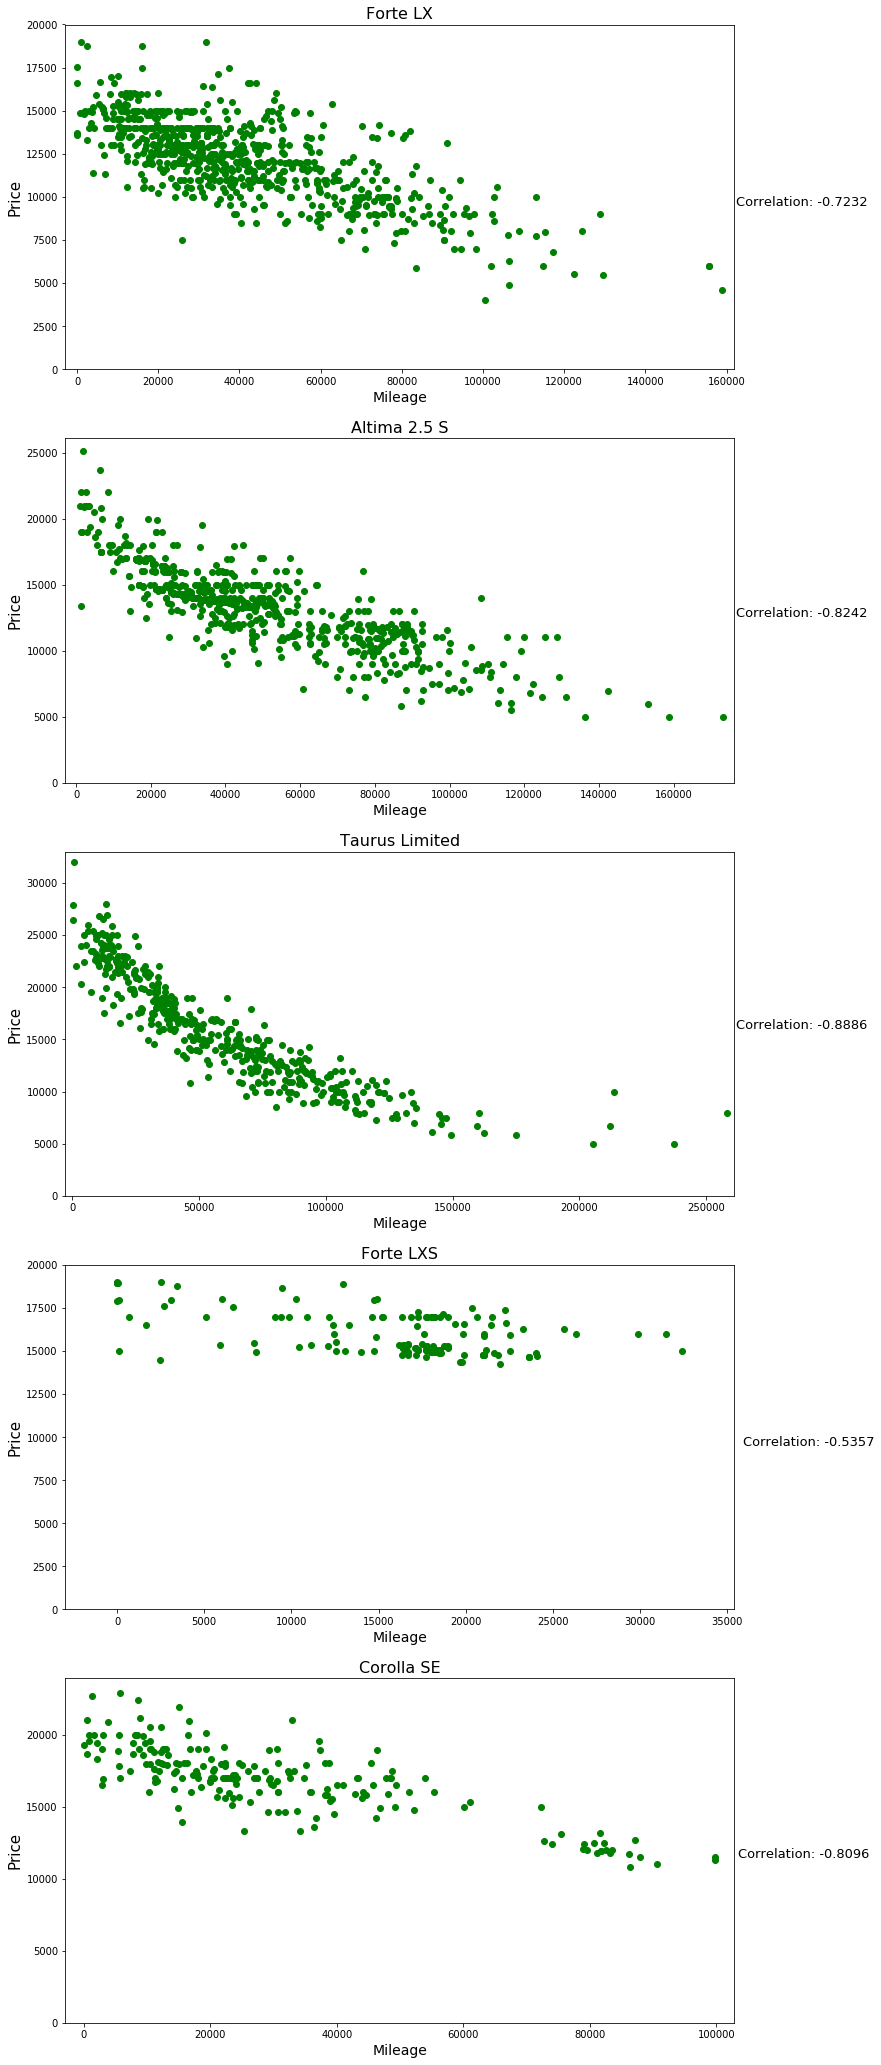

In [18]:
top_models = full_df["model"].value_counts()

top_models = top_models[top_models >= 100].sample(5).index

plt.figure(figsize=(12,30))

for ind in range(len(top_models)):
    plt.subplot(5,1,ind+1)
    
    scatter_data = full_df[(full_df["model"] == top_models[ind])]
    
    plt.scatter(scatter_data["mileage"], scatter_data["price"], color="green")
    
    plt.title(f"{top_models[ind]}", fontsize=16)
    plt.xlabel("Mileage", fontsize=14)
    plt.ylabel("Price", fontsize=15)
    
    plt.xlim([-3000, scatter_data["mileage"].max() + 3000])
    plt.ylim([0, scatter_data["price"].max() + 1000])
    
    corr = scatter_data.corr().loc["price", "mileage"].round(4)
    
    plt.text(scatter_data["mileage"].max() + 3500, scatter_data["price"].max()/2, f"Correlation: {corr}", fontsize=13)
    
plt.subplots_adjust(top=1.05)

# Price Prediction

In [33]:
rmse_results = {}
mae_results = {}
r2_results = {}

car_models = full_df["model"].value_counts()

car_models = car_models[car_models >= 50].index

data = full_df[(full_df["model"].isin(car_models))][["model", "mileage", "year", "price"]].dropna()

X = data[["model", "year", "mileage"]]
y = data["price"]

X_encoded = pd.get_dummies(X, columns=["model"])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.3)

### Linear Regression

In [34]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
prediction = model_lr.predict(X_test)

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

rmse_results["Linear Regression"] = mse**.5
mae_results["Linear Regression"] = mae
r2_results["Linear Regression"] = r2

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**.5}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2765074.9947469737
Root Mean Squared Error: 1662.8514650283632
Mean Absolute Error: 1216.1619701322275
R-Squared: 0.8612848683232046


### K-Nearest Neighbors

In [36]:
warnings.filterwarnings('ignore')

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model_knn = KNeighborsRegressor(n_neighbors=10)
model_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [37]:
prediction = model_knn.predict(X_test_scaled)

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

rmse_results["K-Nearest Neighbors"] = mse**.5
mae_results["K-Nearest Neighbors"] = mae
r2_results["K-Nearest Neighbors"] = r2

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**.5}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2104761.153335844
Root Mean Squared Error: 1450.7794985234125
Mean Absolute Error: 1029.26700316408
R-Squared: 0.8944107407257131


### Decision Tree Regression

In [38]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
prediction = model_tree.predict(X_test)

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

rmse_results["Decision Tree"] = mse**.5
mae_results["Decision Tree"] = mae
r2_results["Decision Tree"] = r2

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**.5}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 7474376.014558535
Root Mean Squared Error: 2733.930506534234
Mean Absolute Error: 1355.116166942896
R-Squared: 0.625034020765775


### Random Forest Regressor

In [40]:
model_rf =  RandomForestRegressor(n_estimators=25)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
prediction = model_rf.predict(X_test)

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

rmse_results["Random Forest"] = mse**.5
mae_results["Random Forest"] = mae
r2_results["Random Forest"] = r2

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**.5}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 3527493.0247722166
Root Mean Squared Error: 1878.1621401711345
Mean Absolute Error: 1140.1252992100563
R-Squared: 0.823036749328735


### Neural Network

In [42]:
X_scaler = StandardScaler().fit(X_train[:2])
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model_nn = Sequential()

model_nn.add(Dense(units=25, activation='relu', input_dim=len(X_train.columns)))
model_nn.add(Dense(units=25, activation='relu',))
model_nn.add(Dense(units=25, activation='relu',))
model_nn.add(Dense(units=25, activation='relu',))

model_nn.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [43]:
model_nn.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

Instructions for updating:
Use tf.cast instead.


In [44]:
model_nn.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 129004393.6639 - mean_absolute_error: 9171.4336 - mean_squared_error: 129004408.0000
Epoch 2/100
 - 1s - loss: 12446958.4021 - mean_absolute_error: 2245.7095 - mean_squared_error: 12446961.0000
Epoch 3/100
 - 1s - loss: 8537791.2444 - mean_absolute_error: 1694.4305 - mean_squared_error: 8537790.0000
Epoch 4/100
 - 1s - loss: 6779803.0106 - mean_absolute_error: 1498.9033 - mean_squared_error: 6779801.5000
Epoch 5/100
 - 1s - loss: 5522384.5336 - mean_absolute_error: 1367.9769 - mean_squared_error: 5522380.5000
Epoch 6/100
 - 1s - loss: 4580089.7661 - mean_absolute_error: 1252.0138 - mean_squared_error: 4580089.5000
Epoch 7/100
 - 1s - loss: 4050510.0773 - mean_absolute_error: 1162.0861 - mean_squared_error: 4050509.2500
Epoch 8/100
 - 1s - loss: 3813747.8207 - mean_absolute_error: 1111.7394 - mean_squared_error: 3813744.7500
Epoch 9/100
 - 1s - loss: 3726894.2119 - mean_absolute_error: 1094.8729 - mean_squared_err

Epoch 75/100
 - 1s - loss: 3439923.5041 - mean_absolute_error: 1017.9737 - mean_squared_error: 3439925.2500
Epoch 76/100
 - 1s - loss: 3441593.5295 - mean_absolute_error: 1019.1295 - mean_squared_error: 3441594.7500
Epoch 77/100
 - 1s - loss: 3428478.4905 - mean_absolute_error: 1016.2278 - mean_squared_error: 3428479.7500
Epoch 78/100
 - 1s - loss: 3423454.9214 - mean_absolute_error: 1012.7987 - mean_squared_error: 3423453.7500
Epoch 79/100
 - 1s - loss: 3425692.6688 - mean_absolute_error: 1012.2098 - mean_squared_error: 3425693.7500
Epoch 80/100
 - 1s - loss: 3436551.8910 - mean_absolute_error: 1013.5207 - mean_squared_error: 3436550.2500
Epoch 81/100
 - 1s - loss: 3422842.6214 - mean_absolute_error: 1012.4554 - mean_squared_error: 3422842.2500
Epoch 82/100
 - 1s - loss: 3437684.7166 - mean_absolute_error: 1017.0042 - mean_squared_error: 3437684.0000
Epoch 83/100
 - 1s - loss: 3424429.0391 - mean_absolute_error: 1011.5708 - mean_squared_error: 3424428.5000
Epoch 84/100
 - 1s - loss: 3

In [45]:
prediction = model_nn.predict(X_test_scaled)

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

rmse_results["Neural Network"] = mse**.5
mae_results["Neural Network"] = mae
r2_results["Neural Network"] = r2

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**.5}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 1928962.549235527
Root Mean Squared Error: 1388.8709620535403
Mean Absolute Error: 1028.4577772822458
R-Squared: 0.9032300047828183


## Results

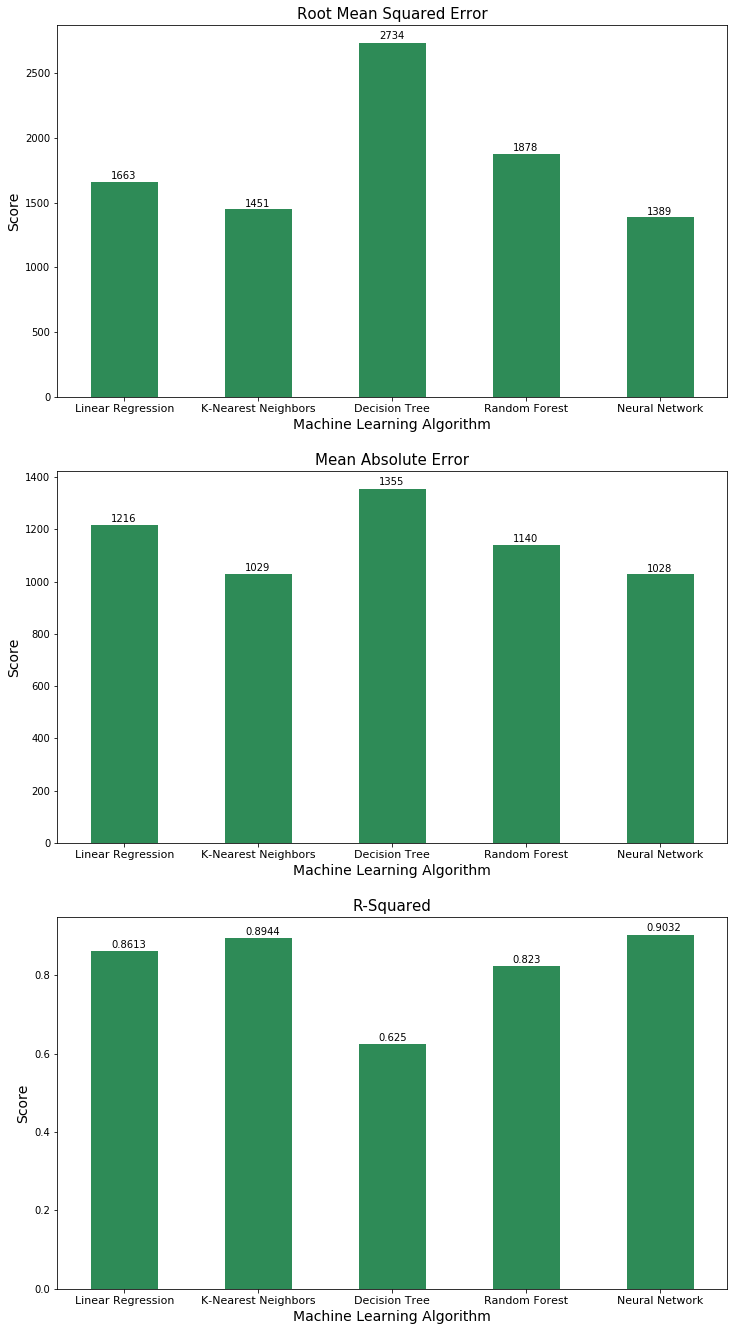

In [46]:
rmse_list = pd.Series(rmse_results).round(0).astype(int)
mae_list = pd.Series(mae_results).round(0).astype(int)
r2_list = pd.Series(r2_results).round(4)

results = pd.concat([rmse_list, mae_list, r2_list], 1)
results.columns = ["Root Mean Squared Error", "Mean Absolute Error", "R-Squared"] 

plt.figure(figsize=(12,18))

for ind in range(3):
    plt.subplot(3,1, ind+1)
    results.iloc[:,ind].plot(kind='bar', color="seagreen")
    
    plt.title(f"{results.columns[ind]}", fontsize=15)
    plt.xlabel("Machine Learning Algorithm", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    
    plt.xticks(rotation = 0, fontsize=11)

    for val in range(5):
        plt.text(val-.1, results.iloc[val,ind] * 1.01, results.iloc[val,ind])

plt.subplots_adjust(top=1.1)